# Principal Component Analysis with Cancer Data

In [329]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [330]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [331]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [332]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [333]:
df.shape

(699, 11)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [335]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [336]:
df.isnull().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [337]:
# lET'S GET RID OF ALL DUPLICATE RECORDS

In [338]:
df.drop_duplicates(keep='first', inplace=True)

In [339]:
df[df.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [340]:
df[df['Bare Nuclei']=='?'].shape

(16, 11)

In [341]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df1 = df[df['Bare Nuclei'] != '?'] 
df1.shape


(675, 11)

In [342]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [343]:
# "Bare nuclei" has data type as object but the entries in it appear to be numeric so we will convert this column into integer
# data type
df1['Bare Nuclei']=df1['Bare Nuclei'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 698
Data columns (total 11 columns):
ID                             675 non-null int64
ClumpThickness                 675 non-null int64
Cell Size                      675 non-null int64
Cell Shape                     675 non-null int64
Marginal Adhesion              675 non-null int64
Single Epithelial Cell Size    675 non-null int64
Bare Nuclei                    675 non-null int32
Normal Nucleoli                675 non-null int64
Bland Chromatin                675 non-null int64
Mitoses                        675 non-null int64
Class                          675 non-null int64
dtypes: int32(1), int64(10)
memory usage: 60.6 KB


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [344]:
df2=df1.drop('ID',axis=1)

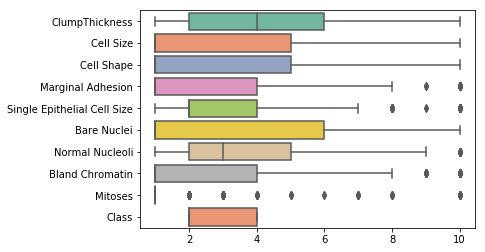

In [345]:
import seaborn as sns
ax = sns.boxplot(data=df2, orient="h", palette="Set2")

In [346]:
import pandas as pd
pd.crosstab(df2['Marginal Adhesion'],df2['Class'])

Class,2,4
Marginal Adhesion,,
1,358,29
2,37,19
3,31,27
4,5,28
5,4,19
6,3,18
7,0,13
8,0,25
9,0,4


In [347]:
# Looking into the box plot above it can be seen that there exist much outliers in our data hence we will brong these to the 
# limit where maximum of the data lies

df2['Marginal Adhesion']=np.where(df2['Marginal Adhesion'] > 4, 4, df2['Marginal Adhesion'])
pd.crosstab(df2['Marginal Adhesion'],df2['Class'])

Class,2,4
Marginal Adhesion,,
1,358,29
2,37,19
3,31,27
4,13,161


In [348]:
pd.crosstab(df2['Single Epithelial Cell Size'],df2['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,41,1
2,352,21
3,28,42
4,7,41
5,5,34
6,1,39
7,2,9
8,2,18
9,0,2


In [349]:
df2['Single Epithelial Cell Size']=np.where(df2['Single Epithelial Cell Size'] > 5, 5, df2['Single Epithelial Cell Size'])
pd.crosstab(df2['Single Epithelial Cell Size'],df2['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,41,1
2,352,21
3,28,42
4,7,41
5,11,131


In [350]:
pd.crosstab(df2['Normal Nucleoli'],df2['Class'])

Class,2,4
Normal Nucleoli,,
1,147,2
2,152,7
3,122,35
4,7,32
5,4,30
6,1,8
7,6,63
8,0,28
9,0,11


In [351]:
df2['Normal Nucleoli']=np.where(df2['Normal Nucleoli'] > 5, 5, df2['Normal Nucleoli'])
pd.crosstab(df2['Normal Nucleoli'],df2['Class'])

Class,2,4
Normal Nucleoli,,
1,147,2
2,152,7
3,122,35
4,7,32
5,11,160


In [352]:
pd.crosstab(df2['Bland Chromatin'],df2['Class'])

Class,2,4
Bland Chromatin,,
1,386,40
2,30,6
3,11,29
4,1,17
5,2,17
6,4,18
7,2,14
8,3,20
9,0,15


In [353]:
df2['Bland Chromatin']=np.where(df2['Bland Chromatin'] > 7, 7, df2['Bland Chromatin'])
pd.crosstab(df2['Bland Chromatin'],df2['Class'])

Class,2,4
Bland Chromatin,,
1,386,40
2,30,6
3,11,29
4,1,17
5,2,17
6,4,18
7,5,109


In [354]:
pd.crosstab(df2['Mitoses'],df2['Class'])

Class,2,4
Mitoses,,
1,426,130
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [355]:
df2['Mitoses']=np.where(df2['Mitoses'] > 3, 3, df2['Mitoses'])
pd.crosstab(df2['Mitoses'],df2['Class'])

Class,2,4
Mitoses,,
1,426,130
2,8,27
3,5,79


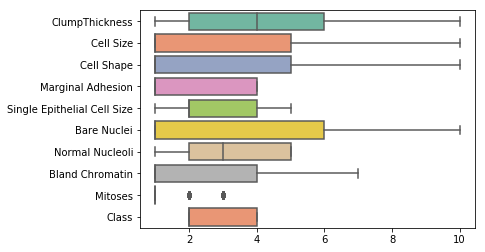

In [356]:
ax = sns.boxplot(data=df2, orient="h", palette="Set2")

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [357]:
df2.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.640847,0.652617,0.555328,0.574004,0.593936,0.570778,0.551908,0.428349,0.715714
Cell Size,0.640847,1.000000,0.905755,0.722887,0.788691,0.689895,0.716093,0.730037,0.512936,0.820663
Cell Shape,0.652617,0.905755,1.000000,0.707383,0.765198,0.710876,0.701117,0.727468,0.484094,0.820688
Marginal Adhesion,0.555328,0.722887,0.707383,1.000000,0.681103,0.698794,0.653619,0.640788,0.424333,0.748966
Single Epithelial Cell Size,0.574004,0.788691,0.765198,0.681103,1.000000,0.674554,0.675500,0.717638,0.486812,0.775949
Bare Nuclei,0.593936,0.689895,0.710876,0.698794,0.674554,1.000000,0.697406,0.623710,0.448557,0.820533
Normal Nucleoli,0.570778,0.716093,0.701117,0.653619,0.675500,0.697406,1.000000,0.668273,0.411717,0.773980
Bland Chromatin,0.551908,0.730037,0.727468,0.640788,0.717638,0.623710,0.668273,1.000000,0.495151,0.746225
Mitoses,0.428349,0.512936,0.484094,0.424333,0.486812,0.448557,0.411717,0.495151,1.000000,0.522780
Class,0.715714,0.820663,0.820688,0.748966,0.775949,0.820533,0.773980,0.746225,0.522780,1.000000


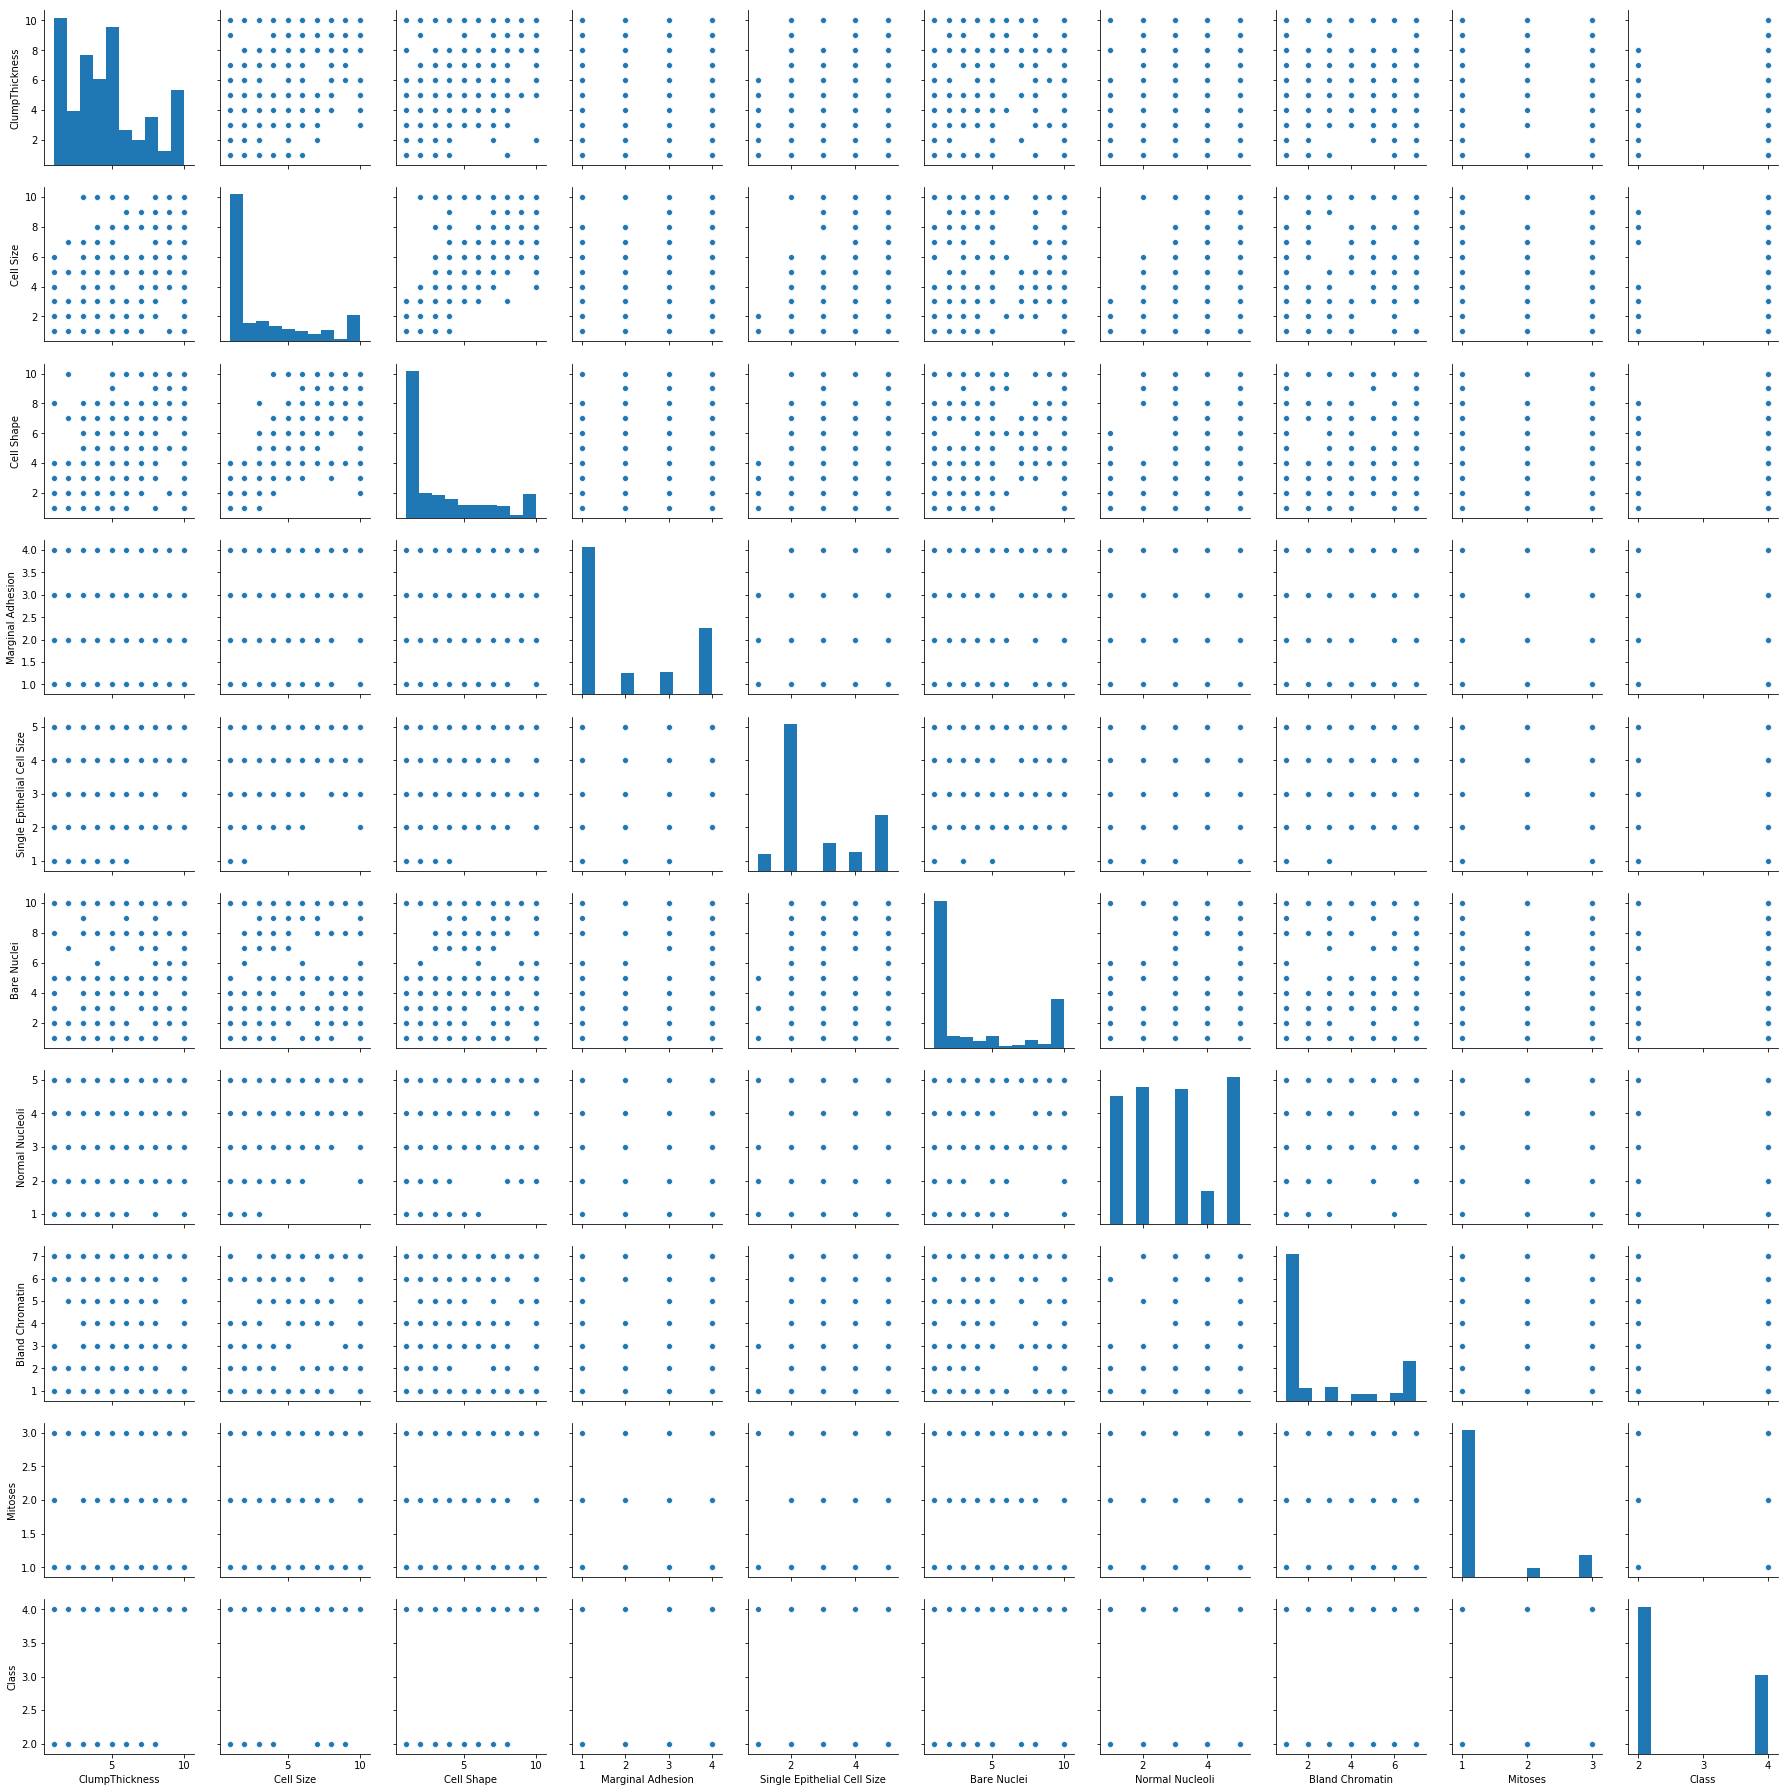

In [358]:
# Check for correlation of variable
sns.pairplot(df2)

In [359]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [360]:
#Let us check for pair plots

In [361]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [362]:
# We could see most of the outliers are now removed.

In [363]:
# Outlier handling & adjustment has been performed in earlier steps using crosstab & where functions, please have a look once

# Q6 Create a covariance matrix for identifying Principal components

In [364]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import datasets

In [365]:
X = df2.drop('Class',axis=1)
X_std = StandardScaler().fit_transform(X)
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Covariance Matrix 
%s [[1.00148368 0.64179757 0.6535854  0.5561516  0.57485527 0.59481694
  0.5716247  0.55272697 0.42898447]
 [0.64179757 1.00148368 0.9070993  0.72395934 0.78986147 0.69091892
  0.71715545 0.73112007 0.51369686]
 [0.6535854  0.9070993  1.00148368 0.70843247 0.76633348 0.71193067
  0.70215755 0.72854694 0.48481237]
 [0.5561516  0.72395934 0.70843247 1.00148368 0.68211329 0.69983114
  0.65458845 0.64173852 0.42496222]
 [0.57485527 0.78986147 0.76633348 0.68211329 1.00148368 0.67555509
  0.67650178 0.7187023  0.48753448]
 [0.59481694 0.69091892 0.71193067 0.69983114 0.67555509 1.00148368
  0.69844062 0.62463577 0.44922258]
 [0.5716247  0.71715545 0.70215755 0.65458845 0.67650178 0.69844062
  1.00148368 0.66926468 0.4123274 ]
 [0.55272697 0.73112007 0.72854694 0.64173852 0.7187023  0.62463577
  0.66926468 1.00148368 0.49588539]
 [0.42898447 0.51369686 0.48481237 0.42496222 0.48753448 0.44922258
  0.4123274  0.49588539 1.00148368]]


# Q7 Identify eigen values and eigen vector

In [366]:
# Step 2- Get eigen values and eigen vector

In [367]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 3.02849119e-01 -1.47532874e-02 -1.84838866e-02 -9.08217216e-01
   1.51000290e-01 -1.29836860e-01  2.02013409e-01  4.89478121e-02
  -7.63771457e-04]
 [ 3.70042561e-01  5.32795641e-02 -7.24150707e-01  7.35583285e-02
   3.11321020e-01  2.10837039e-01 -3.31490426e-01 -2.12220531e-01
   1.84738264e-01]
 [ 3.67412906e-01  9.25205304e-02  6.74476665e-01  1.67929692e-02
   3.04966505e-01  3.76093500e-01 -3.42025791e-01 -2.09482111e-01
   7.70171854e-02]
 [ 3.34640768e-01  1.83891863e-01  4.62157562e-02  1.33120296e-01
  -3.86663848e-01 -1.04837033e-01  4.70289558e-01 -5.47684260e-01
   3.90784312e-01]
 [ 3.50499742e-01  4.16406510e-02  7.19556117e-02  2.31872892e-01
   2.34752719e-01 -7.73337125e-01 -1.23408402e-01 -9.85250734e-02
  -3.71991084e-01]
 [ 3.36944123e-01  1.43963662e-01 -8.96909958e-02 -6.47656063e-02
  -6.07037447e-01  2.70769163e-01 -1.73019928e-01  1.84058287e-02
  -6.17591282e-01]
 [ 3.35264093e-01  2.11644169e-01  5.09718353e-02  7.75591735e-02
  -2.63298

# Q8 Find variance and cumulative variance by each eigen vector

In [368]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained", var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Variance Explained [67.90764151509545, 7.5840506718375, 5.55015297325305, 4.687389529235176, 3.9777951090446995, 3.4072321826345586, 3.085509175387399, 2.8026871686900194, 0.9975416748221418]
Cumulative Variance Explained [ 67.90764152  75.49169219  81.04184516  85.72923469  89.7070298
  93.11426198  96.19977116  99.00245833 100.        ]


In [369]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets

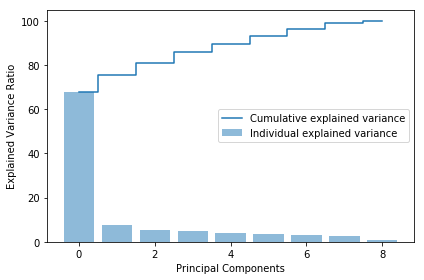

In [370]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [371]:
# First seven principal components explain 99% of the variance in the data. So first seven PCA is shown below

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [372]:
pca = PCA(n_components=7)
X_reduced = pca.fit_transform(X)

In [373]:
X_principalDf = pd.DataFrame(data = X_reduced
             , columns = ['PC1','PC21','PC3','PC4','PC5','PC6','PC7'])

In [374]:
X_principalDf.head(10)

,PC1,PC21,PC3,PC4,PC5,PC6,PC7
0,-3.884491,0.461614,-2.021585,-0.163655,0.520624,-0.715968,-0.474422
1,4.842595,-4.750068,0.205112,1.212113,0.401471,0.677236,1.495924
2,-4.072725,-0.773824,-0.178223,-0.012492,0.450468,-0.653053,-0.557265
3,6.398577,3.986575,1.781953,-0.813026,-1.804962,0.986393,-1.986078
4,-3.901480,0.209159,-1.005600,-0.172961,1.034407,-0.871834,1.347577
5,13.270693,0.720063,1.446797,0.351871,-0.543904,0.233703,-0.230200
6,-0.628919,-7.843199,1.807435,0.608484,-0.163329,0.285357,-1.294280
7,-4.496813,0.164915,0.927675,0.293398,-0.111023,-1.165159,-0.373947
8,-5.208971,-0.051153,0.624033,0.088658,-0.384680,1.008804,0.022775
9,-3.972690,0.656331,-0.893032,0.304545,0.498834,0.482648,-0.449491


# Q10 Find correlation between components and features

C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


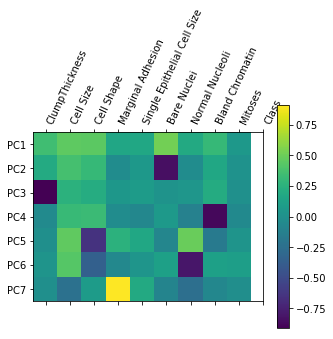

In [375]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6],['PC1','PC2','PC3','PC4','PC5','PC6','PC7'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df2.columns)),df2.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()#

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [376]:
jk = pd.read_csv('jokes.csv')
jk.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [377]:
ratings = jk.iloc[0:200,1:]
ratings.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [378]:
# The dataframe already contains column names hence it has been re-commended by faculty to mention the same here & ignore this
# question.

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [379]:
ratings = ratings.replace(99.00, 0.00)
ratings.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [380]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = pd.DataFrame(sc.fit_transform(ratings))
#pd.DataFrame(ratings_diff)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [381]:
ratings_diff.columns

RangeIndex(start=0, stop=100, step=1)

In [382]:
arr = []
for i in ratings_diff.columns:
    arr.append(ratings_diff[i].mean())

In [383]:
# print maximum element 
print("Largest element is:", max(arr)) 

Largest element is: 1.8408885527065878e-16


In [384]:
arr.sort(reverse = True)
print('Top 10 ratings are:\n',arr[:10])

Top 10 ratings are:
 [1.8408885527065878e-16, 1.2434497875801754e-16, 1.1986939218999736e-16, 1.0658141036401502e-16, 1.0547118733938987e-16, 8.770761894538737e-17, 7.771561172376095e-17, 7.743805596760467e-17, 7.549516567451065e-17, 7.494005416219807e-17]
